<a href="https://colab.research.google.com/github/sutharimanikanta/Golab/blob/main/Brain_Tumor3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035
Receiving objects: 100% (3039/3039), 79.25 MiB | 22.92 MiB/s, done.
Updating files: 100% (3264/3264), done.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import pickle # saving the model
import time
import numpy as np
import keras.optimizers
from sklearn.metrics import classification_report

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)# patience is no of unchanged ,verbose 1 is to print,mode set to minimization

In [ ]:
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                          write_graph=True, write_images=False)# histo is number time of claculation parametrsv and visualize  write graph for visualization of weights

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imutils
import cv2 # image functions
import PIL.Image # python image library
import os # for file functions
%matplotlib inline # to display directly in the collab

demo_datagen = ImageDataGenerator( # creation of objects for argumenattion
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
import os

# Define categories
categories = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# Define paths for training and testing data
train_dir = "./data/train"
test_dir = "./data/test"

# Function to create directories
def make_directories(base_dir):
    for category in categories:
        os.makedirs(os.path.join(base_dir, category), exist_ok=True)

# Create directories for training data
make_directories(train_dir)

# Create directory for testing data
os.makedirs(test_dir, exist_ok=True)

In [ ]:
# import os
# import cv2
# import numpy as np
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# def cropAndAugmentation():
#     # Augmentation Code
#     IMG_SIZE = 80
#     ADD_PIXELS = 5  # Adjust as needed
#     dim = (IMG_SIZE, IMG_SIZE)
#     cwd = os.getcwd()
#     directory = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
#     desired_folder = "Brain-Tumor-Classification-DataSet/Training/"

#     # Create copies of the original dataset with different modifications
#     datasets = [[] for _ in range(3)]

#     for input_folder in directory:
#         input_folder_path = os.path.join(cwd, desired_folder + input_folder)
#         if not os.path.exists(input_folder_path):
#             raise FileNotFoundError(f"Input folder {input_folder_path} does not exist.")

#         for img in os.listdir(input_folder_path):
#             image_path = os.path.join(input_folder_path, img)
#             image = cv2.imread(image_path)
#             resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
#             gray = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)  # convert into gray image
#             gray = cv2.GaussianBlur(gray, (5, 5), 0)
#             thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
#             thresh = cv2.erode(thresh, None, iterations=2)
#             thresh = cv2.dilate(thresh, None, iterations=2)
#             # find contours in thresholded image, then grab the largest one
#             cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#             cnts = imutils.grab_contours(cnts)
#             c = max(cnts, key=cv2.contourArea)
#              # find the extreme points
#             extLeft = tuple(c[c[:, :, 0].argmin()][0])
#             extRight = tuple(c[c[:, :, 0].argmax()][0])
#             extTop = tuple(c[c[:, :, 1].argmin()][0])
#             extBot = tuple(c[c[:, :, 1].argmax()][0])
#             # add contour on the image
#             #to draw a countores on the image  like border
#             img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
#             # add extreme points
#             img_pnt = cv2.circle(img_cnt.copy(), extLeft, 5, (0, 0, 255), -1)
#             img_pnt = cv2.circle(img_pnt, extRight, 5, (0, 255, 0), -1)
#             img_pnt = cv2.circle(img_pnt, extTop, 5, (255, 0, 0), -1)
#             img_pnt = cv2.circle(img_pnt, extBot, 5, (255, 255, 0), -1)
#             # apply crop
#             ADD_PIXELS = 0
#             new_image = image[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()



#             # Resize images for the three datasets

#             rotated_image = cv2.rotate(new_image, cv2.ROTATE_90_CLOCKWISE)
#             flipped_image = cv2.flip(new_image, 1)  # Flip along the vertical direction

#             # Append resized images to datasets
#             datasets[0].append(new_image)
#             datasets[1].append(rotated_image)
#             datasets[2].append(flipped_image)

#     # Concatenate the three datasets into one
#     concatenated_dataset = np.concatenate(datasets, axis=0)

#     # Split the dataset into training and testing sets
#     X_train, X_test = train_test_split(concatenated_dataset, test_size=0.1, random_state=42)

#     # Store training and testing data
#     data_dir = "./data"
#     train_dir = os.path.join(data_dir, "train")
#     test_dir = os.path.join(data_dir, "test")

#     os.makedirs(train_dir, exist_ok=True)
#     os.makedirs(test_dir, exist_ok=True)

#     # Store training images
#     for idx, img_batch in enumerate(X_train):
#         category_folder = directory[idx % len(directory)]
#         img_path = os.path.join(train_dir, category_folder, f"image_{idx}.jpg")
#         os.makedirs(os.path.join(train_dir, category_folder), exist_ok=True)
#         cv2.imwrite(img_path, img_batch)

#     # Store testing images
#     for idx, img in enumerate(X_test):
#         img_path = os.path.join(test_dir, f"image_{idx}.jpg")
#         cv2.imwrite(img_path, img)

#     # Count total number of images
#     total_images = len(X_train) + len(X_test)
#     print("Total number of images:", total_images)
#     print("Number of training images:", len(X_train))
#     print("Number of testing images:", len(X_test))

#     # Display images
#     plt.figure(figsize=(15, 6))
#     for i in range(5):  # Displaying the first 5 images
#         plt.subplot(2, 5, i + 1)
#         plt.imshow(cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB))
#         plt.title('Training Image')
#         plt.axis('off')

#         plt.subplot(2, 5, i + 6)
#         plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB))
#         plt.title('Testing Image')
#         plt.axis('off')

#     plt.tight_layout()
#     plt.show()

# # Execute the function
# cropAndAugmentation()


In [ ]:
import imutils # for image task


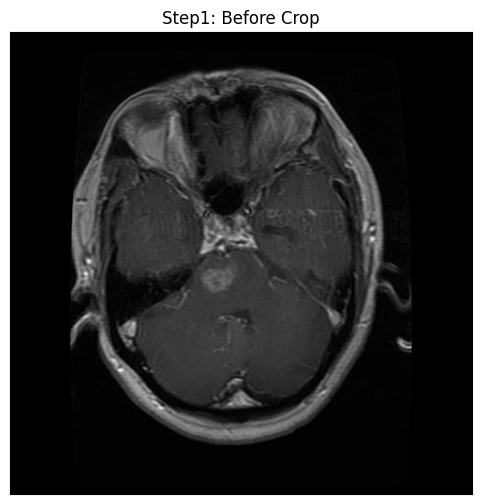

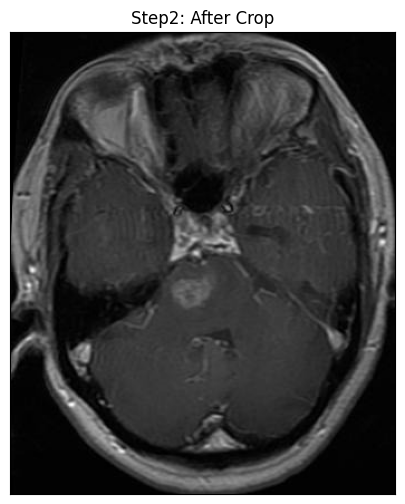

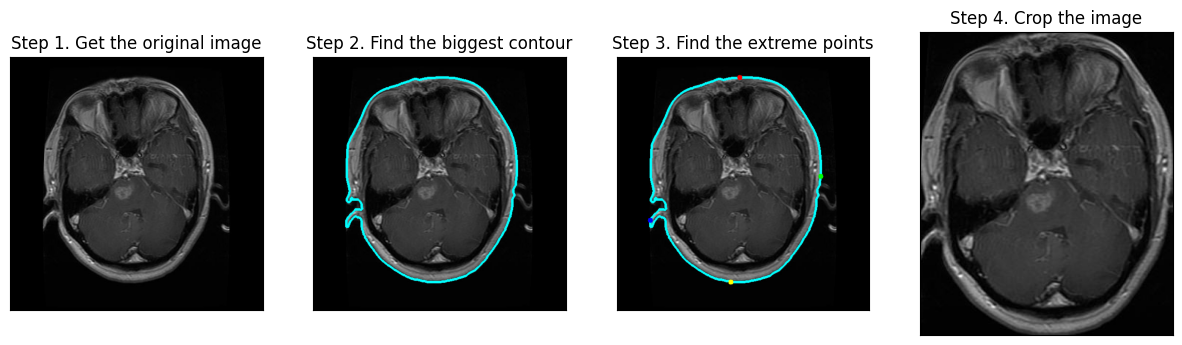

Total number of images: 8610
Number of training images: 7749
Number of testing images: 861


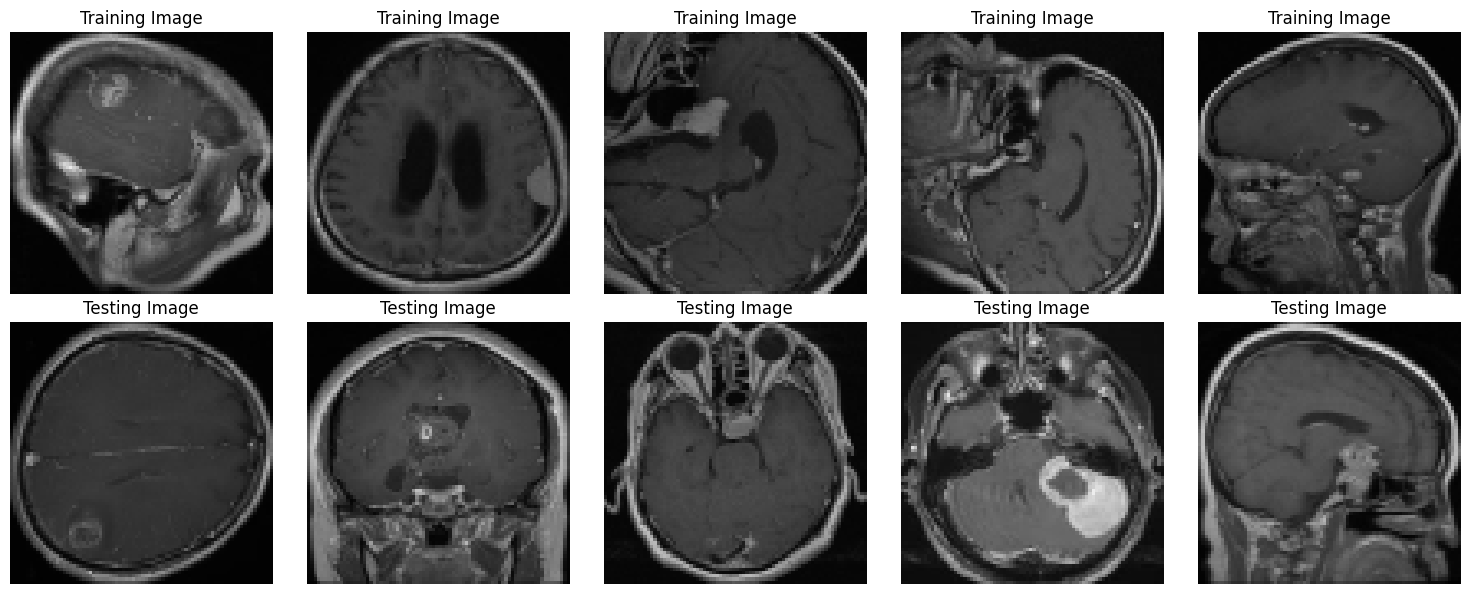

In [ ]:
import os
import cv2

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def cropAndAugmentation():
    # Augmentation Code
    flag1 = 0
    flag2 = 0
    IMG_SIZE = 80
    ADD_PIXELS = 5  # Adjust as needed
    dim = (IMG_SIZE, IMG_SIZE)
    cwd = os.getcwd()
    directory = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
    desired_folder = "Brain-Tumor-Classification-DataSet/Training/"

    # Create copies of the original dataset with different modifications
    datasets = []

    for input_folder in directory:
        input_folder_path = os.path.join(cwd, desired_folder + input_folder)
        if not os.path.exists(input_folder_path):
            raise FileNotFoundError(f"Input folder {input_folder_path} does not exist.")

        for img in os.listdir(input_folder_path):
            image_path = os.path.join(input_folder_path, img)
            image = cv2.imread(image_path)
            # ---*******************************************************

            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # convert into gray image
            gray = cv2.GaussianBlur(gray, (5, 5), 0)
            if flag1 == 0:
                    plt.figure(figsize=(15, 6))
                    plt.imshow(image)
                    plt.xticks([])  # to remove tickmarks
                    plt.yticks([])
                    plt.title('Step1: Before Crop')
                    plt.show()
                    flag1 = 1
            thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
            thresh1 = cv2.erode(thresh, None, iterations=2)
            thresh2 = cv2.dilate(thresh1, None, iterations=2)
            # find contours in thresholded image, then grab the largest one
            cnts = cv2.findContours(thresh2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# reduce the number of counters
            cnts = imutils.grab_contours(cnts)
            c = max(cnts, key=cv2.contourArea)
             # find the extreme points
            extLeft = tuple(c[c[:, :, 0].argmin()][0])
            extRight = tuple(c[c[:, :, 0].argmax()][0])
            extTop = tuple(c[c[:, :, 1].argmin()][0])
            extBot = tuple(c[c[:, :, 1].argmax()][0])
            img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
            # add extreme points
            img_pnt = cv2.circle(img_cnt.copy(), extLeft, 5, (0, 0, 255), -1)
            img_pnt = cv2.circle(img_pnt, extRight, 5, (0, 255, 0), -1)
            img_pnt = cv2.circle(img_pnt, extTop, 5, (255, 0, 0), -1)
            img_pnt = cv2.circle(img_pnt, extBot, 5, (255, 255, 0), -1)
            ADD_PIXELS = 0
            new_image = image[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
            #***********************************************************************************
            resized_image = cv2.resize(new_image, dim, interpolation=cv2.INTER_AREA)
            # Resize images for the three datasets

            rotated_image = cv2.rotate(resized_image, cv2.ROTATE_90_CLOCKWISE)
            flipped_image = cv2.flip(resized_image, 1)  # Flip along the vertical direction
            # Append resized images to datasets
            resized_new_image = cv2.resize(new_image, dim, interpolation=cv2.INTER_AREA)
            resized_rotated_image = cv2.resize(rotated_image, dim, interpolation=cv2.INTER_AREA)
            resized_flipped_image = cv2.resize(flipped_image, dim, interpolation=cv2.INTER_AREA)

            datasets.append(resized_new_image)
            datasets.append(resized_rotated_image)
            datasets.append(resized_flipped_image)

            # Append resized images to datasets

            if flag2==0:
                 plt.figure(figsize=(15,6))
                 plt.imshow(new_image)
                 plt.xticks([])
                 plt.yticks([])
                 plt.title('Step2: After Crop')
                 plt.show()
                #plot_crops()
                 flag2=1
              # '''  #Display crops----------------------------------------------------------
                 #def plot_crops()
                 # '''  # Comment this section during execution
                 plt.figure(figsize=(15,6))
                 plt.subplot(141)
                 plt.imshow(image)
                 plt.xticks([])
                 plt.yticks([])
                 plt.title('Step 1. Get the original image')
                 plt.subplot(142)
                 plt.imshow(img_cnt)
                 plt.xticks([])
                 plt.yticks([])
                 plt.title('Step 2. Find the biggest contour')
                 plt.subplot(143)
                 plt.imshow(img_pnt)
                 plt.xticks([])
                 plt.yticks([])
                 plt.title('Step 3. Find the extreme points')
                 plt.subplot(144)
                 plt.imshow(new_image)
                 plt.xticks([])
                 plt.yticks([])
                 plt.title('Step 4. Crop the image')
                 plt.show()

    # Concatenate the three datasets into one
    concatenated_dataset = np.concatenate(datasets, axis=0)# row wise

    # Split the dataset into training and testing sets
    X_train, X_test = train_test_split(datasets, test_size=0.1, random_state=42)

    # Store training and testing data
    data_dir = "./data"
    train_dir = os.path.join(data_dir, "train")
    test_dir = os.path.join(data_dir, "test")

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Store training images
    for idx, img_batch in enumerate(X_train):
        category_folder = directory[idx % len(directory)] #for cyvling every element
        img_path = os.path.join(train_dir, category_folder, f"image_{idx}.jpg")
        os.makedirs(os.path.join(train_dir, category_folder), exist_ok=True)
        cv2.imwrite(img_path, img_batch)

    # Store testing images
    for idx, img in enumerate(X_test):
        category_folder = directory[idx % len(directory)]  # Get the category folder for this image
        img_path = os.path.join(test_dir, category_folder, f"image_{idx}.jpg")
        os.makedirs(os.path.join(test_dir, category_folder), exist_ok=True)
        cv2.imwrite(img_path, img)

    # Count total number of images
    total_images = len(X_train) + len(X_test)
    print("Total number of images:", total_images)
    print("Number of training images:", len(X_train))
    print("Number of testing images:", len(X_test))

    # Display images
    plt.figure(figsize=(15, 6))
    for i in range(5):  # Displaying the first 5 images
        plt.subplot(2, 5, i + 1)
        plt.imshow(cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB))
        plt.title('Training Image')
        plt.axis('off')

        plt.subplot(2, 5, i + 6)
        plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB))
        plt.title('Testing Image')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
cropAndAugmentation()

In [ ]:
TEST_DIR = '/content/data/test' # test data folder
TRAIN_DIR = '/content/data/train' # train data folder
CATEGORIES =["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]
from tqdm import tqdm
import random


In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DIR, category)  # create path
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path), desc=f"Loading {category} images"):
            # iterate over each image per category
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)  # convert to array
            training_data.append(([img_array, class_num]))  # Store both image and category

    random.shuffle(training_data)
    print("Total number of images in training data:", len(training_data))

create_training_data()

Loading pituitary_tumor images: 100%|██████████| 1937/1937 [00:00<00:00, 2688.73it/s]

Total number of images in training data: 7749


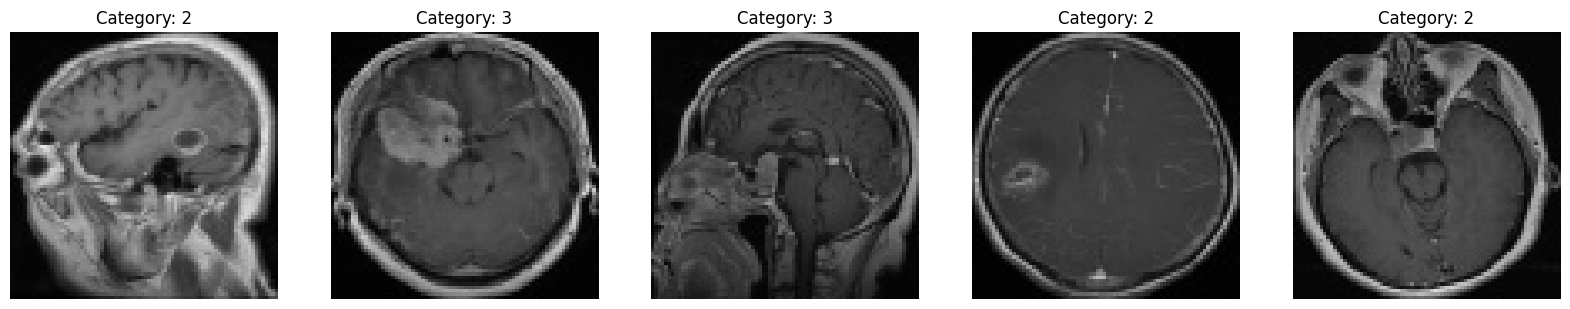

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already imported numpy as np

# Function to display a list of images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
    for i, image in enumerate(images):
        axes[i].imshow(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
        axes[i].set_title(f'Category: {image[1]}')
    plt.show()

# Displaying five random images from training data
display_images(training_data[:5])


In [ ]:
# Convert the list of tuples into a single numpy array
training_data_array = np.array(training_data, dtype=object)

# Save the training data array
np.save('train_data.npy', training_data_array)
print(len(training_data_array))
print("train data")
print()


7749
train data



In [ ]:
# X_train = np.array([i[0] for i in training_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
# Y_train = [i[1] for i in training_data]# features

In [ ]:
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(TEST_DIR, category)  # create path
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            # iterate over each image per category
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_COLOR)  # convert to array
            testing_data.append((img_array, class_num))  # Store both image and category

    random.shuffle(testing_data)
    print("Total number of images in testing data:", len(testing_data))

create_testing_data()

100%|██████████| 215/215 [00:00<00:00, 3500.88it/s]

Total number of images in testing data: 861


In [ ]:
# Convert the list of tuples into a single numpy array
testing_data_array = np.array(testing_data, dtype=object)

# Save the training data array
np.save('test_data.npy', training_data_array)
print(len(testing_data))
print("test data")
print()


861
test data



In [ ]:
# Convert to NumPy array
X_train = np.array([i[0] for i in training_data])
Y_train = np.array([i[1] for i in training_data])
# Convert to NumPy array
X_test = np.array([i[0] for i in testing_data])
Y_test = np.array([i[1] for i in testing_data])

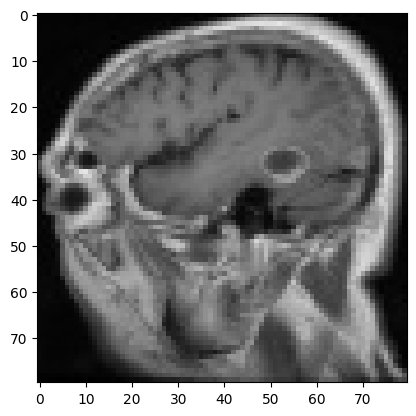

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train is your training dataset containing images
# Make sure X_train[0] is a valid image data
plt.imshow(X_train[0])
plt.show()


In [ ]:
import numpy as np
import cv2

# Reshape and convert training data
X_train = np.array([cv2.resize(img, (80, 80)) for img in X_train])
X_train = X_train.reshape(-1, 80, 80, 3)  # Reshape to add the channel dimension
X_train = X_train.astype('float32') / 255.0  # Normalize pixel values
Y_train = np.array(Y_train)  # Assuming Y_train contains labels or categories

# Reshape and convert testing data
X_test = np.array([cv2.resize(img, (80, 80)) for img in X_test])
X_test = X_test.reshape(-1, 80, 80, 3)  # Reshape to add the channel dimension
X_test = X_test.astype('float32') / 255.0  # Normalize pixel values
Y_test = np.array(Y_test)  # Assuming Y_test contains labels or categories


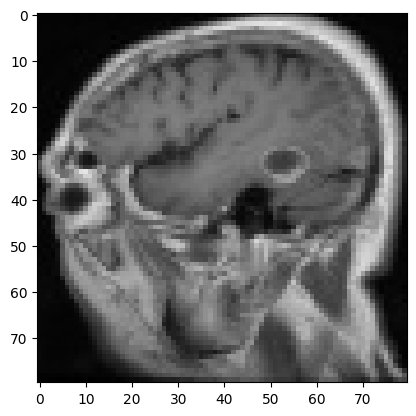

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train is your training dataset containing images
# Make sure X_train[0] is a valid image data
plt.imshow(X_train[0])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import time
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam




In [ ]:
# class Autoencoder(Model):
#     def __init__(self, latent_dim, shape):
#         super(Autoencoder, self).__init__()
#         self.latent_dim = latent_dim
#         self.shape = shape

#     def build(self, input_shape):
#         self.encoder = tf.keras.Sequential([
#             layers.InputLayer(input_shape=self.shape),
#             layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(32, (2, 2), activation='relu', padding='same'),
#             layers.MaxPooling2D((2, 2)),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2))  # Adjusted to match the input shape
#         ])
#         self.decoder = tf.keras.Sequential([
#             layers.Conv2DTranspose(32, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(self.shape[-1], (3, 3), activation='sigmoid', padding='same')
#         ])

#     def call(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded
# X_train_shape = (80,80,3)#X_train.shape[1:]   # Update this line with the correct input shape
# latent_dim = 4
# autoencoder = Autoencoder(latent_dim, X_train_shape)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, Model

# class Autoencoder(Model):
#     def __init__(self, latent_dim, shape):
#         super(Autoencoder, self).__init__()
#         self.latent_dim = latent_dim
#         self.shape = shape

#     def build(self, input_shape):
#         self.encoder = tf.keras.Sequential([
#             layers.InputLayer(input_shape=self.shape),
#             layers.Conv2D(128, (2, 2), activation=tf.nn.leaky_relu, padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(128, (2, 2), activation=tf.nn.leaky_relu, padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(64, (2, 2), activation=tf.nn.leaky_relu, padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(64, (2, 2), activation=tf.nn.leaky_relu, padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(32, (2, 2), activation=tf.nn.leaky_relu, padding='same'),
#             layers.MaxPooling2D((2, 2)),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2))  # Adjusted to match the input shape
#         ])
#         self.decoder = tf.keras.Sequential([
#             layers.Conv2DTranspose(32, (2, 2), activation=tf.nn.leaky_relu, padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(64, (2, 2), activation=tf.nn.leaky_relu, padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(64, (2, 2), activation=tf.nn.leaky_relu, padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),  # Adjusted to match the downsampling factor
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(128, (2, 2), activation=tf.nn.leaky_relu, padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(128, (2, 2), activation=tf.nn.leaky_relu, padding='same'),
#             layers.BatchNormalization(),
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(self.shape[-1], (3, 3), activation='tanh', padding='same')
#         ])

#     def call(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

# X_train_shape = (80, 80, 3)  # X_train.shape[1:]   # Update this line with the correct input shape
# latent_dim = 4
# autoencoder = Autoencoder(latent_dim, X_train_shape)


In [ ]:
# class Autoencoder(Model):
#     def __init__(self, latent_dim, shape):
#         super(Autoencoder, self).__init__()
#         self.latent_dim = latent_dim
#         self.shape = shape

#     def build(self, input_shape):
#         self.encoder = tf.keras.Sequential([
#             layers.InputLayer(input_shape=self.shape),
#             layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.MaxPooling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2D(32, (2, 2), activation='relu', padding='same'),
#             layers.MaxPooling2D((2, 2)),
#             layers.BatchNormalization(),
#         ])
#         self.decoder = tf.keras.Sequential([
#             layers.Conv2DTranspose(32, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(64, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.Conv2DTranspose(128, (2, 2), activation='relu', padding='same'),
#             layers.BatchNormalization(),
#             layers.UpSampling2D((2, 2)),
#             layers.Dropout(0.1),
#             layers.Conv2DTranspose(self.shape[-1], (3, 3), activation='sigmoid', padding='same')
#         ])

#     def call(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded


# X_train_shape = (80, 80, 3)
# latent_dim = 4
# autoencoder = Autoencoder(latent_dim, X_train_shape)


In [ ]:
# autoencoder.compile(loss='mse',
#                           optimizer=Adam(learning_rate=0.01),
#                           metrics=['accuracy'],
#                           )
from tensorflow.keras.optimizers import Adam

# Define the clipping value
clip_value = 0.5  # You can adjust this value as needed

# Compile the model with gradient clipping
autoencoder.compile(loss='mse',
                    optimizer=Adam(learning_rate=0.001, clipvalue=clip_value),
                    metrics=['accuracy'])


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape

    def build(self, input_shape):
        self.encoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=self.shape, name='Input_1'),
            layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2d'),
            layers.BatchNormalization(name='Batch_normalization'),
            layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2d_1'),
            layers.BatchNormalization(name='Batch_normalization_1'),
            layers.MaxPooling2D(pool_size=(2, 2), name='Max_pooling2d'),
            layers.Dropout(0.1, name='Dropout'),
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2d_2'),
            layers.BatchNormalization(name='Batch_normalization_2'),
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2d_3'),
            layers.BatchNormalization(name='Batch_normalization_3'),
            layers.MaxPooling2D(pool_size=(2, 2), name='Max_pooling2d_1'),
            layers.Dropout(0.1, name='Dropout_1'),
            layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2d_4'),
            layers.BatchNormalization(name='Batch_normalization_4'),
            layers.MaxPooling2D(pool_size=(2, 2), name='Max_pooling2d_2'),
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='Conv8'),
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2d_11'),
            layers.BatchNormalization(name='Batch_normalization_10'),
            layers.MaxPooling2D(pool_size=(2, 2), name='Max_pooling2d_7'),
            layers.Dropout(0.1, name='Dropout_5'),
            layers.Flatten(name='Flatten'),
            layers.Dense(self.latent_dim, name='Dense')
        ])

        self.decoder = tf.keras.Sequential([
            layers.InputLayer(input_shape=(self.latent_dim,), name='Input_2'),
            layers.Reshape((1, 1, self.latent_dim), name='Reshape'),
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2d_12'),
            layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', name='Conv2d_13'),
            layers.BatchNormalization(name='Batch_normalization_11'),
            layers.UpSampling2D(size=(4, 4), name='Up_sampling2d'),
            layers.Dropout(0.1, name='Dropout_6'),
            layers.Conv2DTranspose(self.shape[-1], (3, 3), activation='sigmoid', padding='same', name='Conv2d_transpose')
         ])


    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Define the input shape
X_train_shape = (80, 80, 3)

# Define the latent dimension
latent_dim = 4

# Instantiate the autoencoder model
autoencoder = Autoencoder(latent_dim, X_train_shape)
autoencoder.build((None,) + X_train_shape)

# Print the summary of the entire autoencoder model
print("Encoder Summary:")
autoencoder.encoder.summary()
print("\nDecoder Summary:")
autoencoder.decoder.summary()


Encoder Summary:
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2d (Conv2D)             (None, 80, 80, 128)       3584      
                                                                 
 Batch_normalization (Batch  (None, 80, 80, 128)       512       
 Normalization)                                                  
                                                                 
 Conv2d_1 (Conv2D)           (None, 80, 80, 128)       147584    
                                                                 
 Batch_normalization_1 (Bat  (None, 80, 80, 128)       512       
 chNormalization)                                                
                                                                 
 Max_pooling2d (MaxPooling2  (None, 40, 40, 128)       0         
 D)                                                              
                                    

In [ ]:
X_train.shape

(7749, 80, 80, 3)

In [ ]:
autoencoder.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
history=autoencoder.fit(X_train, X_train,
                batch_size=32,
                epochs=5,
                shuffle=True,
                validation_data=(X_test, X_test))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()


In [ ]:
scores = autoencoder.evaluate(X_test, X_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
# import matplotlib.pyplot as plt
# decoded_imgs = autoencoder.predict(X_test)



In [ ]:
batch_size = 32  # Define your batch size
encoded_test_data = []

# Iterate through X_test in batches
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i+batch_size]
    encoded_batch = autoencoder.predict(batch)
    encoded_test_data.append(encoded_batch)


# Concatenate the encoded batches
encoded_test_data = np.concatenate(encoded_test_data, axis=0)


In [ ]:
batch_size = 32  # Define your batch size
encoded_train_data = []

# Iterate through X_train in batches
for i in range(0, len(X_train), batch_size):
    batch = X_train[i:i+batch_size]
    encoded_batch = autoencoder.predict(batch)
    encoded_train_data.append(encoded_batch)


# Concatenate the encoded batches
encoded_train_data = np.concatenate(encoded_train_data, axis=0)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Function to display random images
# def display_random_images(images, num_images=5):
#     plt.figure(figsize=(15, 3))
#     random_indices = np.random.choice(len(images), num_images, replace=False)
#     for i, idx in enumerate(random_indices):
#         plt.subplot(1, num_images, i + 1)
#         plt.imshow(images[idx])
#         plt.axis('off')
#     plt.show()

# # Assuming you have a dataset named "dataset" containing images
# # Replace "dataset" with your actual dataset
# random_sample = np.random.choice(encoded_train_data, 5)
# display_random_images(random_sample)


In [ ]:
encoded = autoencoder(X_train[:32])

In [ ]:
import matplotlib.pyplot as plt

# Select the index of the image you want to visualize
image_index = 0  # Change this index as needed

# Encode the selected image
encoded_image = autoencoder(X_train[image_index][np.newaxis, ...])

# Display the encoded representation
plt.imshow(encoded_image[0])  # Assuming encoded_image is a batch, select the first image
plt.show()


In [ ]:

#encoded=autoencoder(X_train[0])
plt.imshow(encoded)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display random images
def display_random_images(images, num_images=5):
    plt.figure(figsize=(15, 3))
    random_indices = np.random.choice(len(images), num_images, replace=False)
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx])
        plt.axis('off')
    plt.show()

# Assuming you have a dataset named "encoded_train_data" containing encoded images
# Replace "encoded_train_data" with your actual dataset
display_random_images(encoded_train_data)


In [ ]:
# import numpy as np


# # Now, the shape of single_image_batch is (1, 80, 80, 3)
# # Pass this to the encoder
# encoded_test_data = autoencoder(X_test
# )
# encoded_train_data = autoencoder(X_train
# )



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display original and reconstructed images
def display_original_and_reconstructed_samples(original_images, reconstructed_images):
    num_samples = min(len(original_images), len(reconstructed_images))
    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        # Display original image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original")
        plt.axis('off')

        # Display reconstructed image
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(reconstructed_images[i])
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()


sample_images = X_test[:5]
reconstructed_images = encoded_test_data[:5]  # Corrected here

# Display original and reconstructed images
display_original_and_reconstructed_samples(sample_images, reconstructed_images)


In [ ]:
reconstructed_images.shape

In [ ]:
# import numpy as np

# # Encode Training and Testing Data

# encoded_test_data = autoencoder.encoder(X_test[])

# # Decode Encoded Data



# # Create CNN Dataset with Decoded Images and Labels
# cnn_decoded_train_data = list(zip(decoded_train_data, Y_train))
# cnn_decoded_test_data = list(zip(decoded_test_data, Y_test))

# # Convert to NumPy arrays
# cnn_decoded_train_data = np.array(cnn_decoded_train_data)
# cnn_decoded_test_data = np.array(cnn_decoded_test_data)

# # Verify the shapes
# print("Shape of CNN decoded training data:", cnn_decoded_train_data.shape)
# print("Shape of CNN decoded testing data:", cnn_decoded_test_data.shape)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Define the model architecture using Sequential API
model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(80, 80, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Dropout(0.1),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


In [ ]:
# Assuming autoencoder is already initialized
# Reconstruct images using the autoencoder

# Assuming Y_train[:100] and Y_test[:100] are your target labels
# # Convert them to one-hot encoded vectors
# Y_train_one_hot = to_categorical(Y_train, num_classes=4)
# Y_test_one_hot = to_categorical(Y_test, num_classes=4)

# Fit the model using the reconstructed images and target labels
model.fit(encoded_train_data , Y_train, batch_size=32,epochs=10, validation_data=(encoded_test_data, Y_test))


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(encoded_test_data)
conf_matrix=confusion_matrix(y_pred,Y_test)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already evaluated your classifier on the test data
loss, accuracy = model.evaluate(encoded_test_data, Y_test)

# Make predictions on the test data
y_pred = model.predict(encoded_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to single labels
y_test_classes = np.argmax(Y_test, axis=1)

# Generate classification report
report = classification_report(y_test_classes, y_pred_classes)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", report)


In [ ]:
from tensorflow.keras.utils import to_categorical

Y_test = to_categorical(Y_test)

In [ ]:
y_test_classes = np.argmax(Y_test, axis=1)

# Generate classification report
report = classification_report(y_test_classes, y_pred_classes)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", report)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, Model
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import confusion_matrix
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import SGDClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# # X_encoded_train = autoencoder.encoder.predict(X_train)
# # X_encoded_test = autoencoder.encoder.predict(X_test)

# # Now you can use the original data for classification

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, Y_train)
# y_pred_knn = knn.predict(X_test)
# cm_knn = confusion_matrix(Y_test, y_pred_knn)

# # Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, Y_train)
# y_pred_rf = rf.predict(X_test)
# cm_rf = confusion_matrix(Y_test, y_pred_rf)

# # SVM
# svm = SVC(kernel='linear', random_state=42)
# svm.fit(X_train, Y_train)
# y_pred_svm = svm.predict(X_test)
# cm_svm = confusion_matrix(Y_test, y_pred_svm)

# # Logistic Regression
# lr = LogisticRegression(random_state=42)
# lr.fit(X_train, Y_train)
# y_pred_lr = lr.predict(X_test)
# cm_lr = confusion_matrix(Y_test, y_pred_lr)

# # SGD
# sgd = SGDClassifier(random_state=42)
# sgd.fit(X_train, Y_train)
# y_pred_sgd = sgd.predict(X_test)
# cm_sgd = confusion_matrix(Y_test, y_pred_sgd)

# # MLP
# mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
# mlp.fit(X_train, Y_train)
# y_pred_mlp = mlp.predict(X_test)
# cm_mlp = confusion_matrix(Y_test, y_pred_mlp)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
import torch.optim as optim
from sklearn.utils import shuffle
from PIL import Image
%matplotlib inline

#Custom Neural Network Class¶

class BrainTumorModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1,256,kernel_size=3),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256,32,kernel_size=2)
        )
        self.linear1 = nn.Linear(62,128)
        self.linear2 = nn.Linear(128,64)
        self.flat = nn.Flatten(1)
        self.linear3 = nn.Linear(126976,2)

    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        x = self.flat(x)
        x = self.linear3(x)

        return x

model = BrainTumorModel()
model.to(device)

#CNN
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

epochs = 200
batch_size = 32
loss_list = []
for epoch in range(epochs):
    total_loss = 0
    for n in range(len(dataset)//batch_size):

        data,target = dataset[n*batch_size:(n+1)*batch_size]

        ypred = model.forward(data.float())
        loss = loss_fn(ypred,target)

        total_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_list.append(total_loss/batch_size)
    if epoch%10 == 0:
        print(f'Epochs: {epoch} Loss: {total_loss/n}')

fig = plt.figure(figsize=(10,10))
plt.plot(list(range(epochs)),loss_list)
plt.title("Loss v/s Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

mapping = {0:'no',1:'yes'}
fig = plt.figure(figsize=(20,20))
for i in range(20):
    data,target = dataset[i]
    pred = model.forward(data.float())
    pred = torch.argmax(pred,dim=1)
    plt.subplot(4,5,i+1)
    plt.imshow(data[0][0].cpu())
    plt.title(f'Actual: {mapping[target.cpu().detach().item()]} Predicted: {mapping[pred.cpu().detach().item()]}')
plt.show()

#Autoencoder

dataset_autoencoder = BrainMRIDataset("../input/shiva_mri",autoencoder=True,height=28,width=28)

class BrainTumorAutoencodes(nn.Module):

    def __init__(self,dim):

        super().__init__()
        self.lin1 = nn.Linear(dim*dim,542)
        self.lin2 = nn.Linear(542,345)
        self.lin3 = nn.Linear(345,128)
        self.lin4 = nn.Linear(128,64)
        self.lin5 = nn.Linear(64,32)
        self.lin6 = nn.Linear(32,64)
        self.lin7 = nn.Linear(64,128)
        self.lin8 = nn.Linear(128,345)
        self.lin9 = nn.Linear(345,542)
        self.lin10 = nn.Linear(542,dim*dim)

    def forward(self,x):
        x = F.relu(self.lin1(x))
        x = self.lin2(x)
        x = F.relu(self.lin3(x))
        x = F.relu(self.lin4(x))
        x = self.lin5(x)
        x = F.relu(self.lin6(x))
        x = F.relu(self.lin7(x))
        x = self.lin8(x)
        x = F.relu(self.lin9(x))
        x = F.relu(self.lin10(x))

        return x

autoencoder = BrainTumorAutoencodes(28)
autoencoder.to(device)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

from IPython.display import clear_output
epochs = 500
batch_size = 32
loss_list = []
for epoch in range(epochs):
    clear_output(True)
    total_loss = 0
    for n in range(len(dataset_autoencoder)//batch_size):

        data,target = dataset_autoencoder[n*batch_size:(n+1)*batch_size]

        ypred = autoencoder.forward(data.float())
        loss = loss_fn(ypred,data.float())

        total_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_list.append(total_loss/batch_size)

    figure = plt.figure(figsize=(20,20))
    for i in range(20):
        plt.subplot(4,5,i+1)
        image = ypred[i].cpu().detach().numpy()# plot the sample
        image = image.reshape(28,28)
        fig = plt.figure
        plt.imshow(image, cmap='gray')
        plt.title(f'Epochs: {epoch} Loss: {total_loss/n}')
    plt.show()

